In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=300,
                           n_features=300,
                           n_informative=6,
                           n_redundant=2,
                           n_repeated=1,
                           n_classes=4,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(7), importances[indices][:7],
       color="r", yerr=std[indices][:7], align="center")
plt.xticks(range(7), indices)
plt.xlim([-1, 7])
plt.show()

Feature ranking:
1. feature 4 (0.015251)
2. feature 2 (0.010290)
3. feature 6 (0.009794)
4. feature 7 (0.009734)
5. feature 0 (0.009560)
6. feature 5 (0.008944)
7. feature 1 (0.008714)
8. feature 8 (0.007831)
9. feature 296 (0.004367)
10. feature 224 (0.004231)


<Figure size 640x480 with 1 Axes>

In [2]:
X.shape

(300, 300)

In [3]:
y.shape

(300,)

In [4]:
type(X)

numpy.ndarray

In [5]:
df = pd.DataFrame(X)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,2.926377,-0.628587,1.897598,2.063998,-2.163928,2.521349,-1.118580,4.607042,-0.628587,-0.119097,...,-0.940117,-0.446600,2.406165,-0.970424,0.535909,1.630895,-0.511889,-0.506862,1.434213,-0.094325
1,-1.901828,-1.356621,1.323246,1.274005,-2.154545,0.213045,0.585549,4.271858,-1.356621,1.011094,...,1.861192,-0.299974,0.841579,-0.218278,-0.757397,0.928673,1.778558,-0.222907,1.605281,2.751286
2,-3.327729,-3.041534,1.903078,-0.126718,-0.134507,-2.376598,3.034947,2.475186,-3.041534,0.436710,...,-1.322465,0.868515,-1.148765,-0.496060,0.559782,0.913943,0.027123,1.474957,1.352606,-1.324069
3,1.037780,-0.341895,0.592403,2.096240,-0.264972,2.742113,-1.405430,2.693586,-0.341895,0.165570,...,0.401441,-0.841265,1.038028,0.821734,-0.401827,1.242354,-1.477763,-1.017205,1.041728,-0.187446
4,1.176603,-0.609668,1.064606,1.063428,-1.973239,0.557535,-0.163625,3.258394,-0.609668,0.385064,...,1.925299,1.497133,1.260594,1.198686,0.172497,-0.792698,0.818366,-0.399474,0.572111,-0.541816


In [7]:
df['class'] = pd.Series(y)

In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,class
295,2.510627,0.647595,-0.026283,-3.039846,-2.233095,-1.557107,-0.615031,-1.468769,0.647595,-0.339238,...,1.385930,0.388837,-0.171648,0.007020,0.929662,-0.530904,0.779505,0.191579,0.662391,3
296,3.726862,1.044218,-1.748509,-0.739732,-2.616805,1.510956,-3.854746,0.640272,1.044218,0.094163,...,0.060761,-0.456116,0.851252,0.621768,0.986723,-0.777298,1.519941,0.028641,-1.061200,3
297,2.359853,0.128363,2.559654,-0.454025,0.268232,-2.792795,3.894987,-0.831888,0.128363,-0.865169,...,-1.153128,0.407889,0.216608,0.571972,-0.135703,-0.495505,0.843918,-0.844492,-0.568189,3
298,1.077802,-0.157579,1.586509,-0.968558,-1.906482,-0.293097,0.378384,1.077028,-0.157579,1.144668,...,-0.993368,1.588588,0.734177,0.129128,0.486444,-1.785509,-0.479987,0.968448,0.992167,3
299,1.307471,0.318015,-2.068322,-0.067406,-2.697121,1.023794,-3.324802,1.824906,0.318015,-1.813022,...,0.392372,-0.166315,-0.664602,1.652784,0.053311,0.694938,0.675927,0.434657,1.049980,3


In [56]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 301 columns):
Feat0      float64
Feat1      float64
Feat2      float64
Feat3      float64
Feat4      float64
Feat5      float64
Feat6      float64
Feat7      float64
Feat8      float64
Feat9      float64
Feat10     float64
Feat11     float64
Feat12     float64
Feat13     float64
Feat14     float64
Feat15     float64
Feat16     float64
Feat17     float64
Feat18     float64
Feat19     float64
Feat20     float64
Feat21     float64
Feat22     float64
Feat23     float64
Feat24     float64
Feat25     float64
Feat26     float64
Feat27     float64
Feat28     float64
Feat29     float64
Feat30     float64
Feat31     float64
Feat32     float64
Feat33     float64
Feat34     float64
Feat35     float64
Feat36     float64
Feat37     float64
Feat38     float64
Feat39     float64
Feat40     float64
Feat41     float64
Feat42     float64
Feat43     float64
Feat44     float64
Feat45     float64
Feat46     float64
F

In [61]:
df = df.loc[:, df.isnull().mean() < .8] #remove columns with NA more than 80%

In [ ]:
#df = df.dropna(thresh=2, axis=1) # Keep only the rows with at least 2 non-NA values.

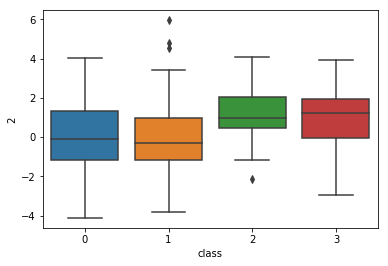

In [9]:
ax = sns.boxplot(x="class", y=2, data=df)

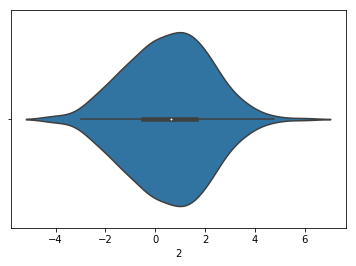

In [10]:
ax = sns.violinplot(df[2], vert=False)

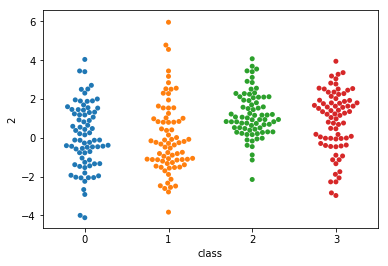

In [11]:
ax = sns.swarmplot(x="class", y=2, data=df)

In [12]:
importances[indices][:3]

array([ 0.01525102,  0.01029023,  0.00979368])

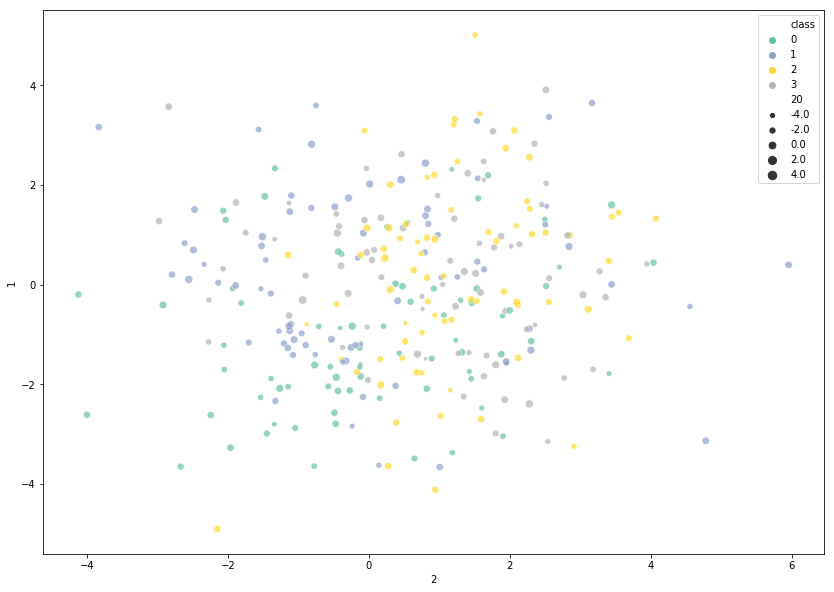

In [13]:
plt.figure(figsize=(14, 10))
ax = sns.scatterplot(x=2, y=1, hue="class", palette="Set2", alpha=0.7,data=df, size=20)

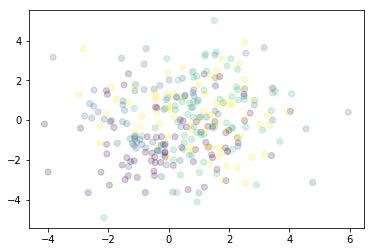

In [14]:
plt.scatter(df[2], df[1], alpha=0.2, c=df['class'], cmap='viridis')

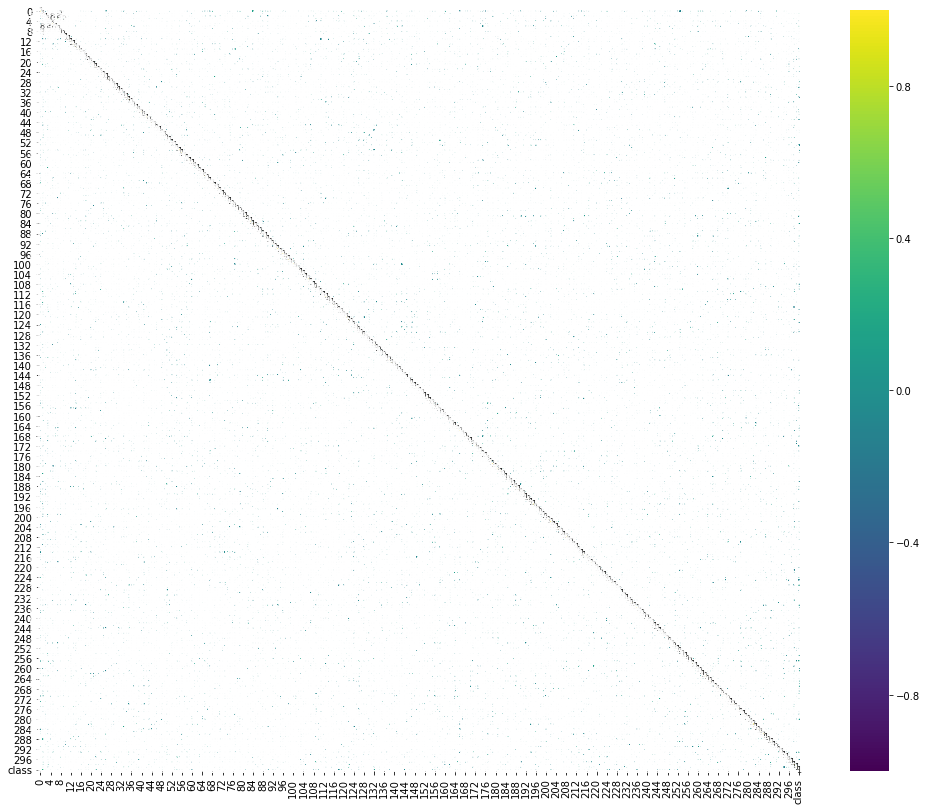

In [15]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(18, 14))

sns.heatmap(corr[(corr >= 0.05) | (corr <= -0.04)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [16]:
df[[4, 6, 5]].head()

,4,6,5
0,-2.163928,-1.118580,2.521349
1,-2.154545,0.585549,0.213045
2,-0.134507,3.034947,-2.376598
3,-0.264972,-1.405430,2.742113
4,-1.973239,-0.163625,0.557535


/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1296x1008 with 0 Axes>

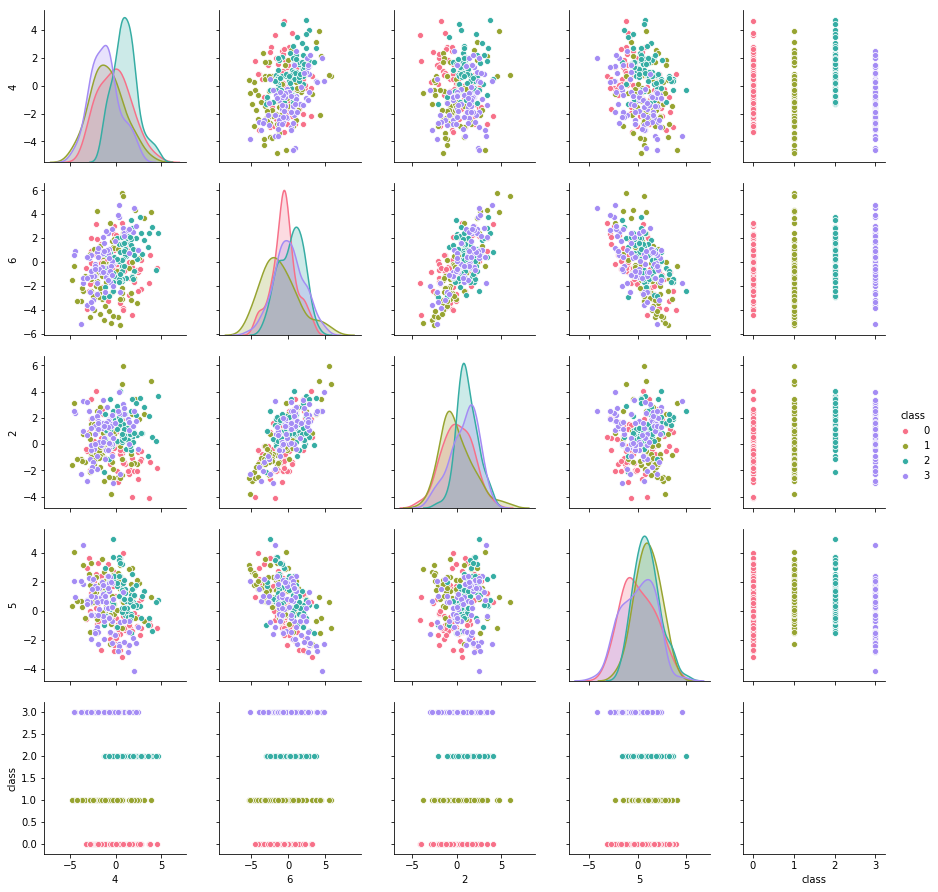

In [17]:
plt.figure(figsize=(18, 14))
plot = sns.pairplot(df[[4, 6, 2, 5, 'class']], hue='class', palette='husl')

In [18]:
tips = sns.load_dataset("tips")

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1296x1008 with 0 Axes>

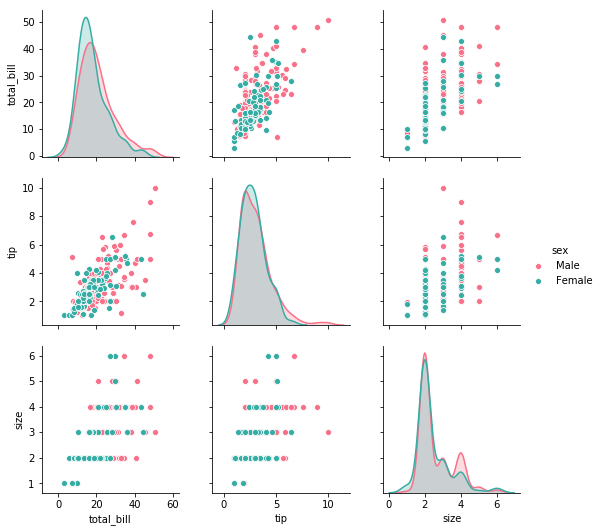

In [20]:
plt.figure(figsize=(18, 14))
plot = sns.pairplot(tips, hue='sex', palette='husl')

In [21]:
X = tips.drop(columns=['sex', 'smoker', 'day', 'time']).values

In [22]:
Y = tips['sex'].values

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 20.43    1.225   0.636]
[[ 16.99   1.01   2.  ]
 [ 10.34   1.66   3.  ]
 [ 21.01   3.5    3.  ]
 [ 23.68   3.31   2.  ]
 [ 24.59   3.61   4.  ]]


In [25]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

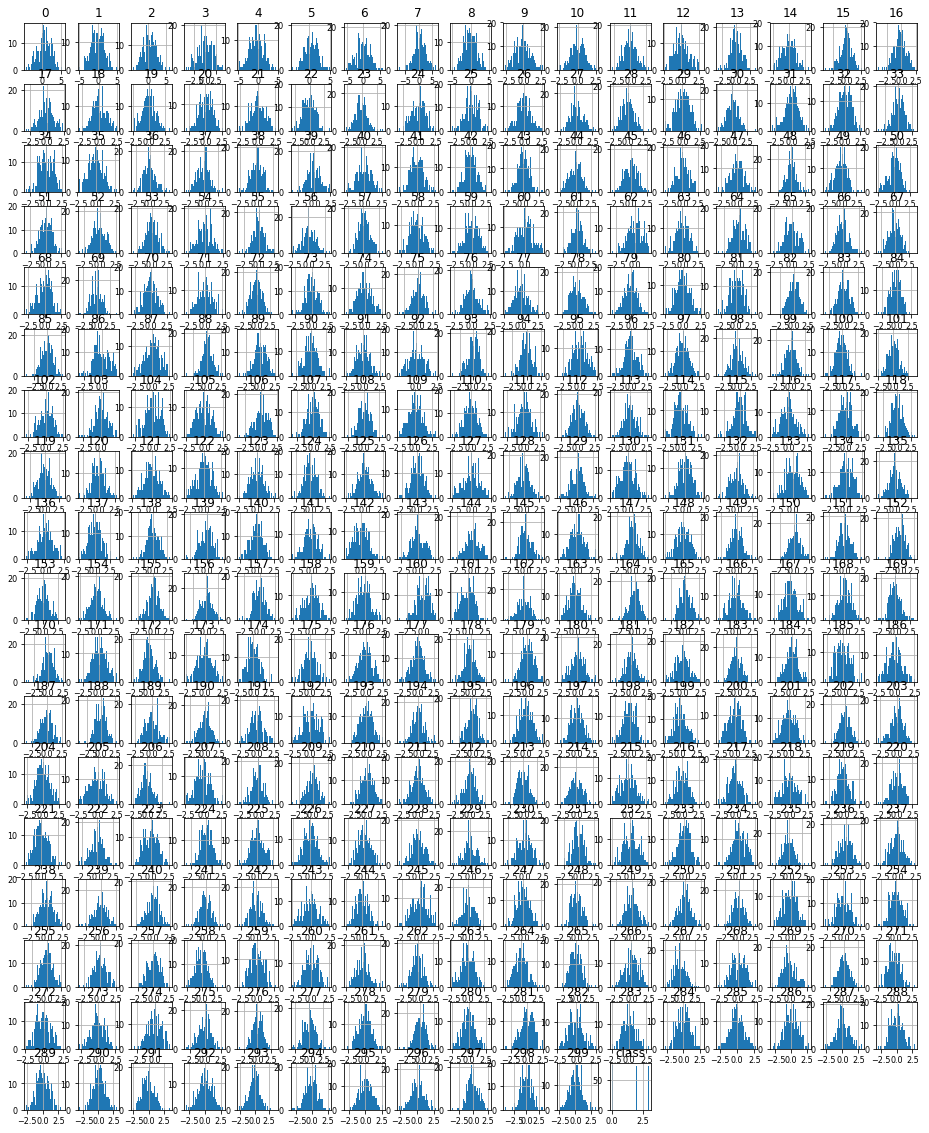

In [26]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [27]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [28]:
df = df.rename(columns=lambda x: 'Feat' + str(x) if str(x) != 'class' else x)

In [29]:
df.shape

(300, 301)

In [30]:
domain_features = df.drop(columns=['class']).values

In [31]:
train_labels = df['class']

In [32]:
domain_features_names = list(df.drop(columns=['class']).columns)

In [33]:
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, criterion="entropy")

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [34]:
feature_importance_values_domain = random_forest_domain.feature_importances_

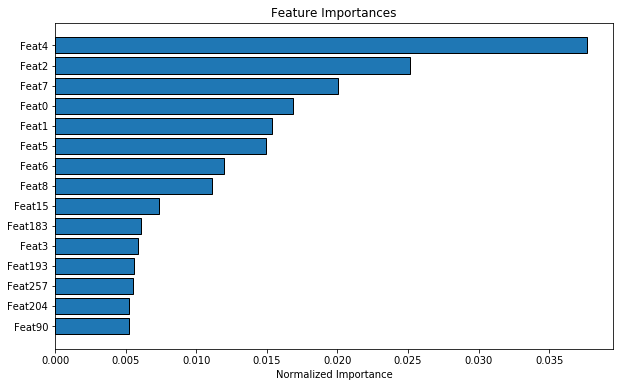

In [35]:
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [36]:
feature_importances_sorted.head(10)

,index,feature,importance,importance_normalized
0,4,Feat4,0.037652,0.037652
1,2,Feat2,0.025159,0.025159
2,7,Feat7,0.020055,0.020055
3,0,Feat0,0.016835,0.016835
4,1,Feat1,0.015386,0.015386
5,5,Feat5,0.014932,0.014932
6,6,Feat6,0.011924,0.011924
7,8,Feat8,0.011136,0.011136
8,15,Feat15,0.007355,0.007355
9,183,Feat183,0.006086,0.006086


In [37]:
topFeatures = list(feature_importances_sorted['feature'].values[:5])

In [38]:
topFeatures.append('class')

In [39]:
df_top = df[topFeatures]

In [40]:
df_top.head()

,Feat4,Feat2,Feat7,Feat0,Feat1,class
0,-2.163928,1.897598,4.607042,2.926377,-0.628587,0
1,-2.154545,1.323246,4.271858,-1.901828,-1.356621,0
2,-0.134507,1.903078,2.475186,-3.327729,-3.041534,0
3,-0.264972,0.592403,2.693586,1.037780,-0.341895,0
4,-1.973239,1.064606,3.258394,1.176603,-0.609668,0


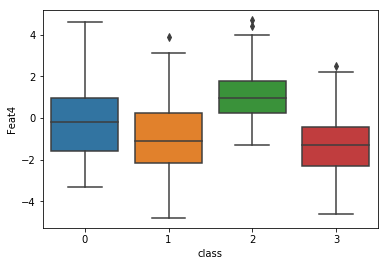

In [41]:
ax = sns.boxplot(x="class", y=topFeatures[0], data=df_top)

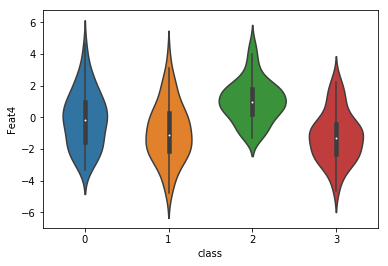

In [42]:
ax = sns.violinplot(x="class", y=topFeatures[0], data=df_top)

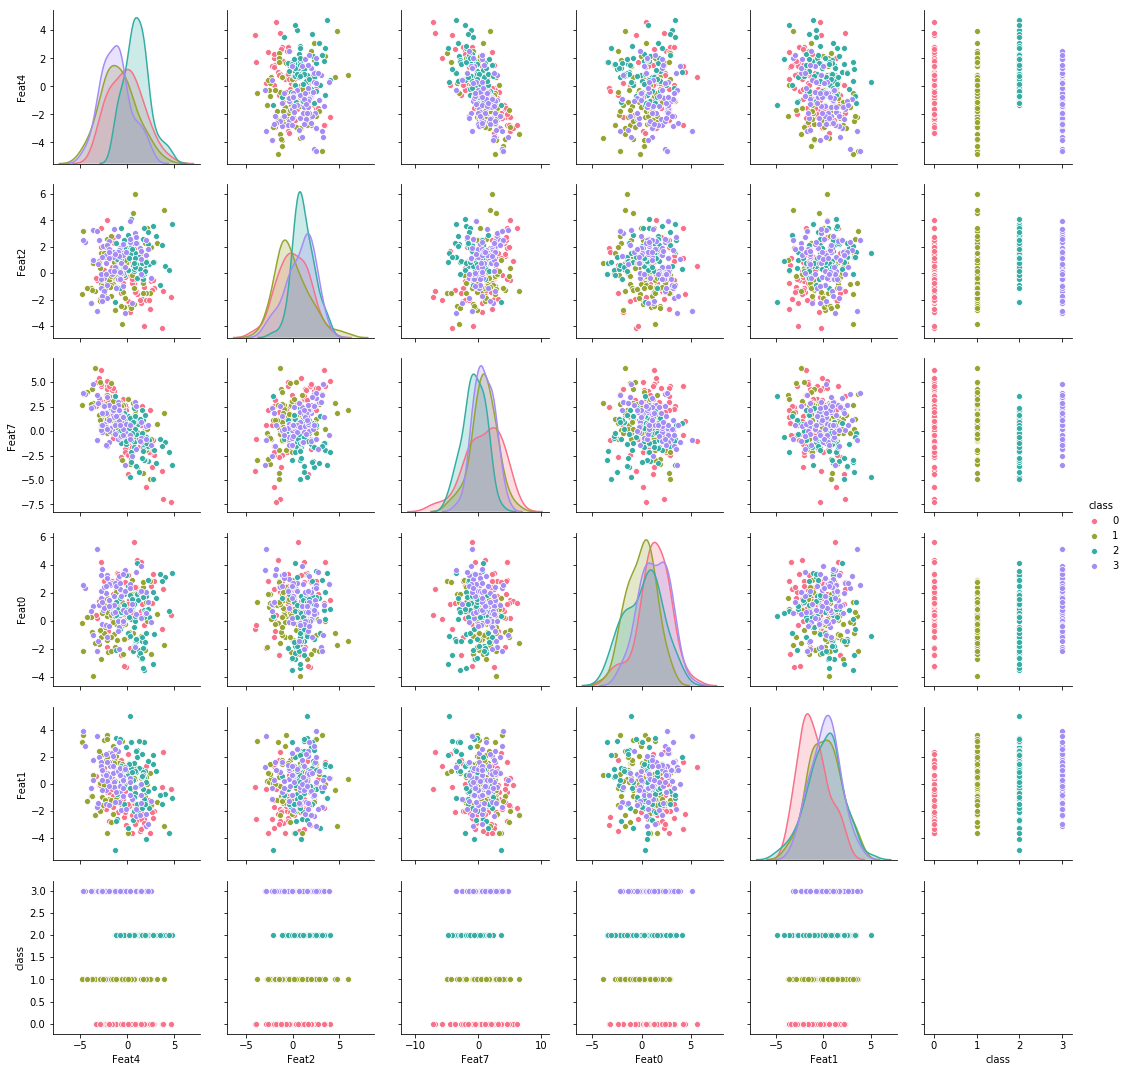

In [43]:
plot = sns.pairplot(df_top, hue='class', palette='husl')

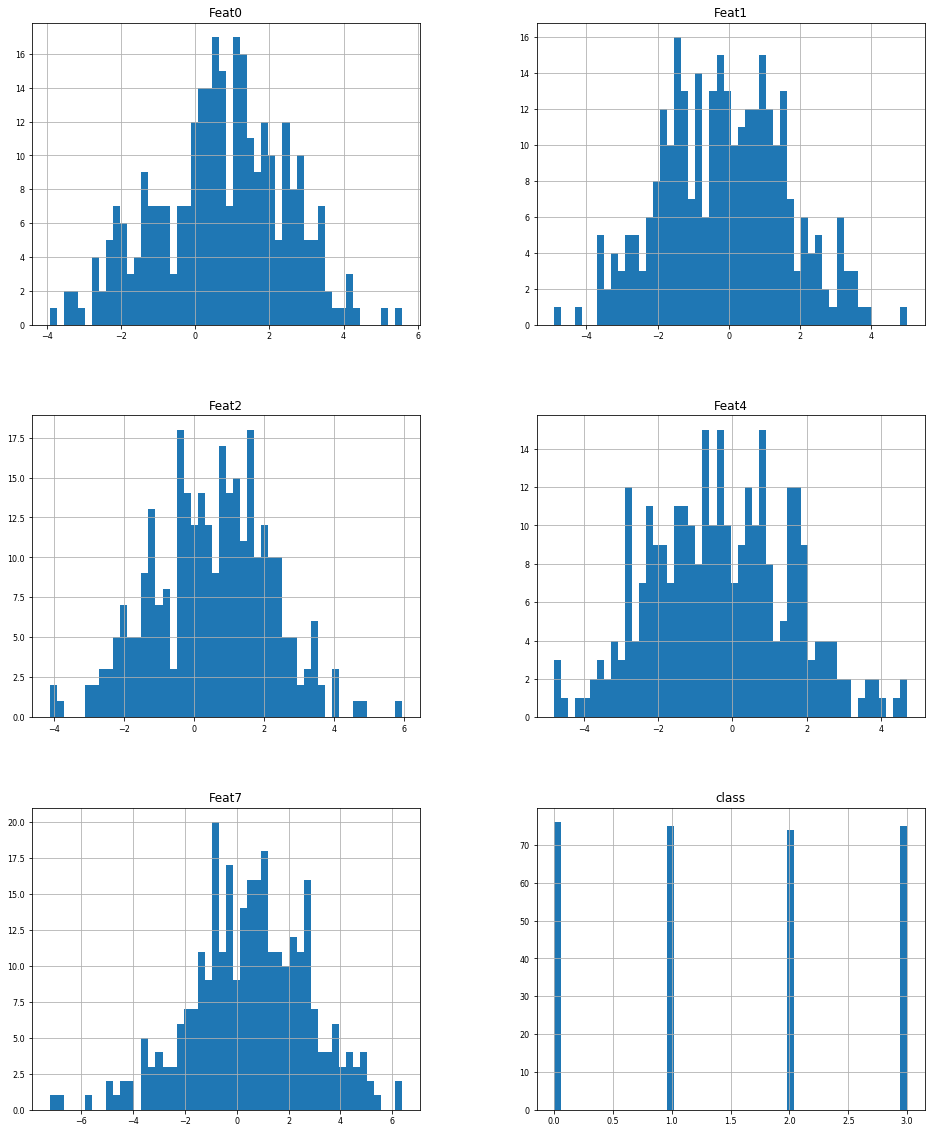

In [44]:
df_top.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [45]:
iris = sns.load_dataset("iris")

In [46]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [47]:
domain_features = iris.drop(columns=['species']).values

In [48]:
train_labels = iris['species']

In [49]:
domain_features_names = list(iris.drop(columns=['species']).columns)

In [50]:
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

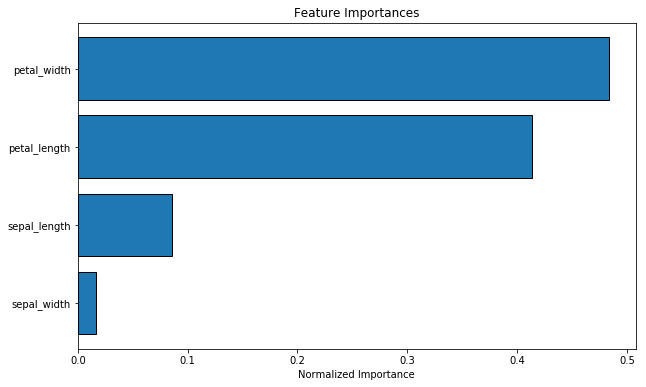

In [51]:
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

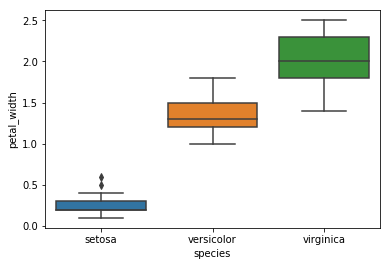

In [52]:
ax = sns.boxplot(x="species", y="petal_width", data=iris)

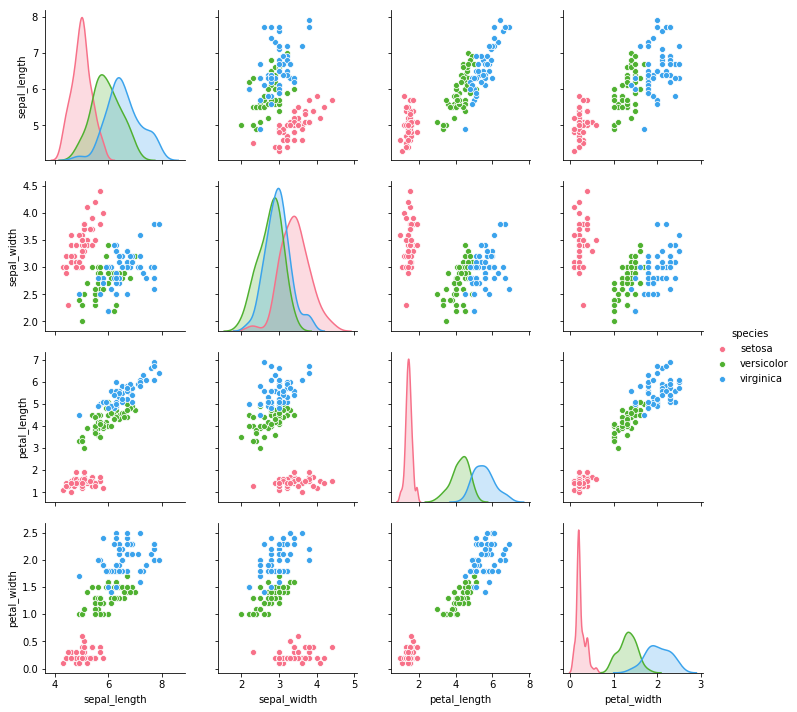

In [53]:
plot = sns.pairplot(iris, hue='species', palette='husl')